In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\income,spent.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

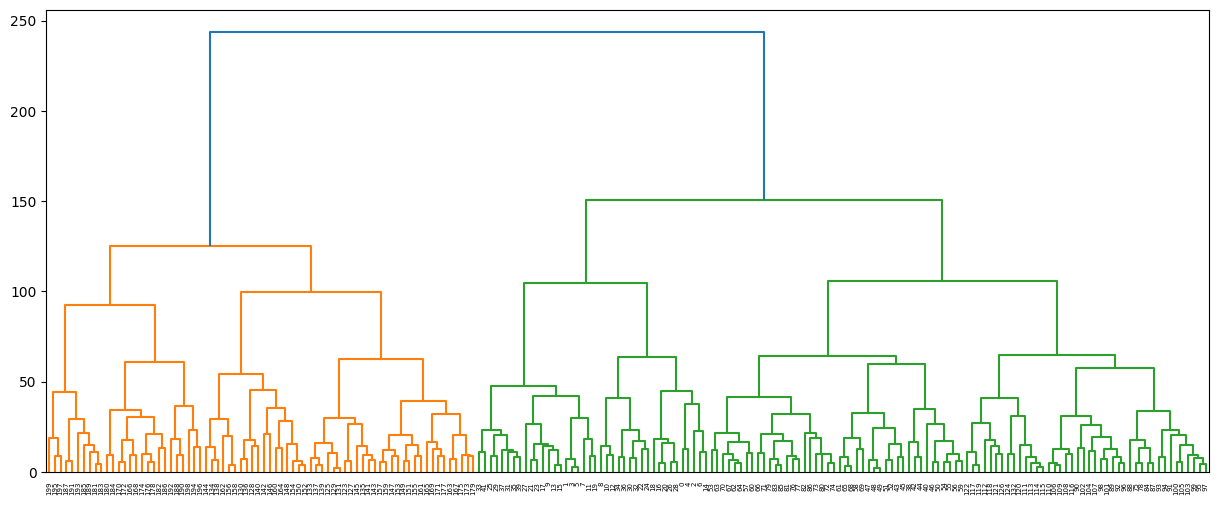

In [6]:
import scipy.cluster.hierarchy as hi
plt.figure(figsize=(15,6))
dendrogram=hi.dendrogram(hi.linkage(df,method='complete'))
plt.show()

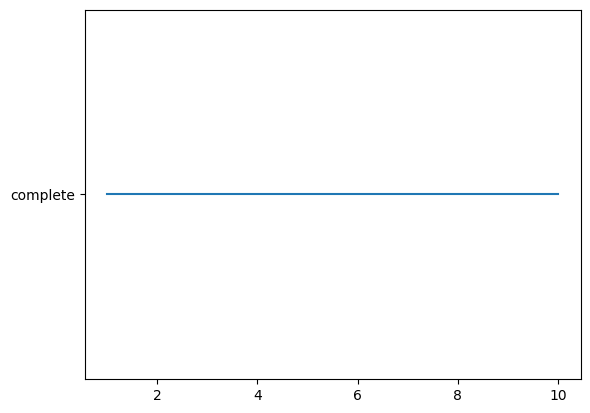

In [7]:
from sklearn.cluster import AgglomerativeClustering
cs=[]
for i in range(1,11):
    agg=AgglomerativeClustering(n_clusters=i,linkage='complete')
    agg.fit(df)
    cs.append(agg.linkage)
plt.plot(range(1,11),cs)
plt.show()


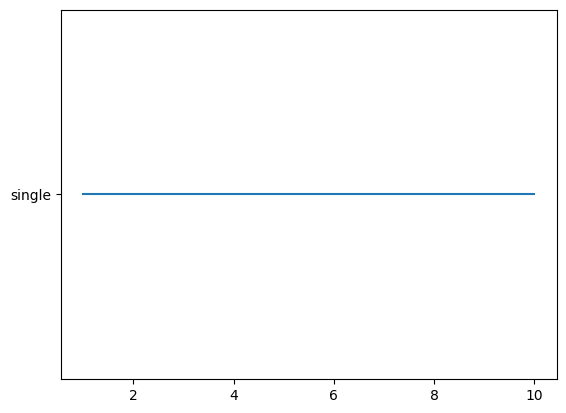

In [8]:
from sklearn.cluster import AgglomerativeClustering
cs=[]
for i in range(1,11):
    agg=AgglomerativeClustering(n_clusters=i,linkage='single')
    agg.fit(df)
    cs.append(agg.linkage)
plt.plot(range(1,11),cs)
plt.show()


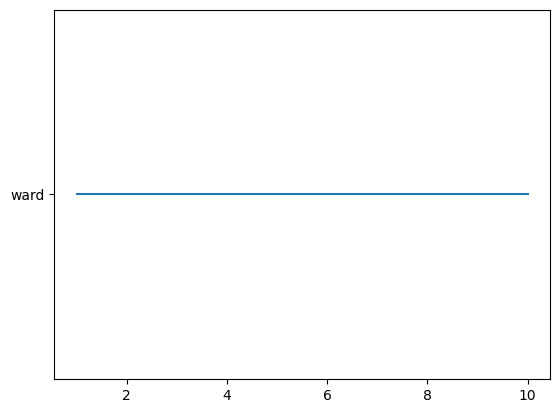

In [9]:
from sklearn.cluster import AgglomerativeClustering
cs=[]
for i in range(1,11):
    agg=AgglomerativeClustering(n_clusters=i)
    agg.fit(df)
    cs.append(agg.linkage)
plt.plot(range(1,11),cs)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,linkage='average')
y_means=agg.fit_predict(df)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [20]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,y_means)
print(score)

0.4438365108161371


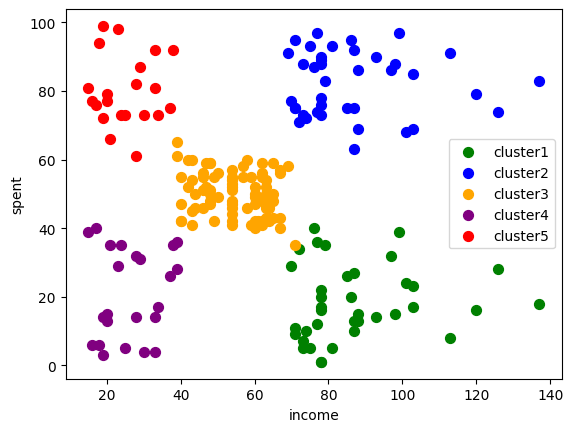

In [16]:
x=df.iloc[:,[3,4]].values
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='blue',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c='orange',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c='purple',label='cluster4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c='red',label='cluster5')
plt.legend()
plt.xlabel('income')
plt.ylabel('spent')
plt.show()